<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-297_SOTA/blob/main/AutoVimL_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ReadMe: 

Reference:

https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb

1. Reproduce the tutorial using my own scraped dataset from politifact.
   https://www.politifact.com/factchecks/list/


In [6]:
!pip install deep_autoviml -q

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
from deep_autoviml import deep_autoviml as deepauto

In [13]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [17]:
# Download Politifact dataset
data = "/content/drive/MyDrive/cmpe-297-SOTA/data/"
file = "political_reputation_score.csv"
df = pd.read_csv(data+file, sep=',')
target = 'reputationScore'
print(df.shape)
df.head(5)

(29970, 8)


,author,date,statement,source,date_published,target,ratingScore,reputationScore
0,Tom Kertscher,"April 21, 2021",Two photos show climate change “is a hoax.”,Facebook posts,"April 18, 2021",false,6,1
1,Andy Nguyen,"April 21, 2021",“Black Lives Matter and antifa set Catholic ch...,Instagram posts,"April 20, 2021",false,6,1
2,Samantha Putterman,"April 21, 2021",Photo shows President Barack Obama posing with...,Viral image,"April 20, 2020",pants-fire,5,1
3,Bill McCarthy,"April 21, 2021",Derek Chauvin’s trial and conviction for the m...,Facebook posts,"April 20, 2021",pants-fire,5,1
4,Michael Majchrowicz,"April 21, 2021",Women’s menstrual cycles and fertility are aff...,Facebook posts,"April 15, 2021",false,6,1


In [19]:
df[target].value_counts()

1    23976
0     5994
Name: reputationScore, dtype: int64

In [20]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 350, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
train = data+file

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 350
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows > maxrows, loading a random sample of 10000 rows into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (10000, 8) into pandas dataframe to analyze...
    Classifying

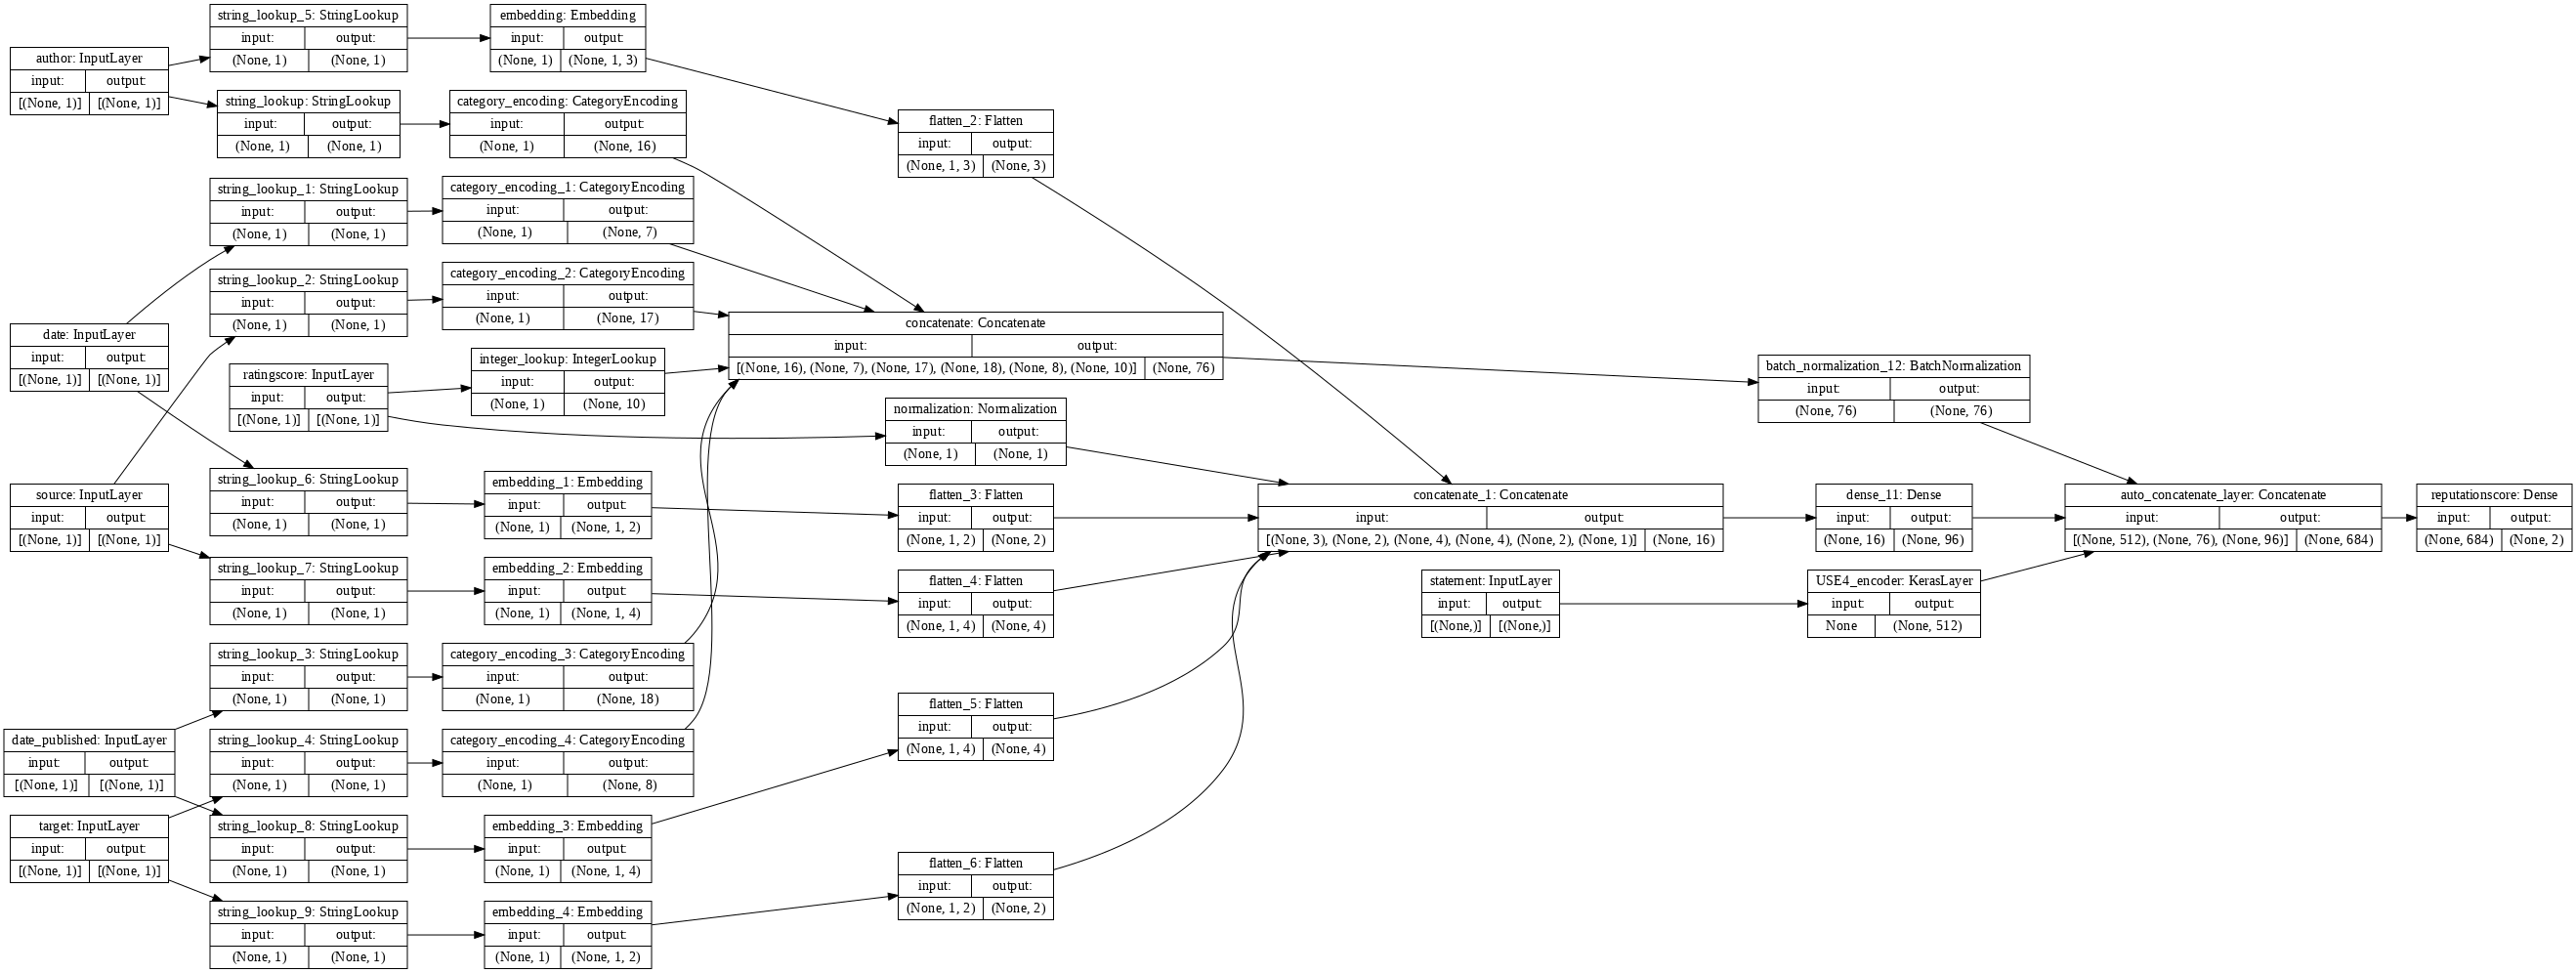

Model plot saved in file: deep_autoviml_jbb_autoviml_nlp_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 2.5839793281653747, 1: 1.0}
    original datasize = 29971, initial batchsize = 32
    recommended steps per epoch = 468
    recommended OneCycle steps = 327950
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 350, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting validati

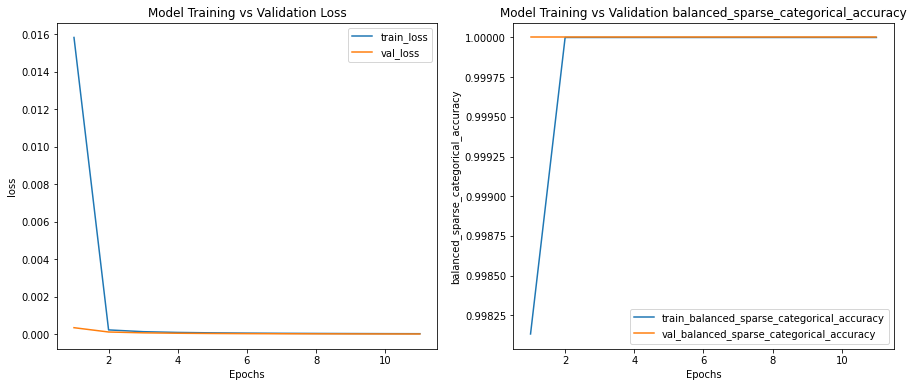


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: reputationScore
#################################################################


    Accuracy          = 100.0%
    Balanced Accuracy = 100.0%
    Precision         = 100.0%
    Average Precision = 100.0%
    Recall            = 100.0%
    F1 Score          = 100.0%
    ROC AUC           = 100.0%
#####################################################

Training on full train dataset for 1 epochs. This will take time...
    completed. Time taken (in mins) = 0


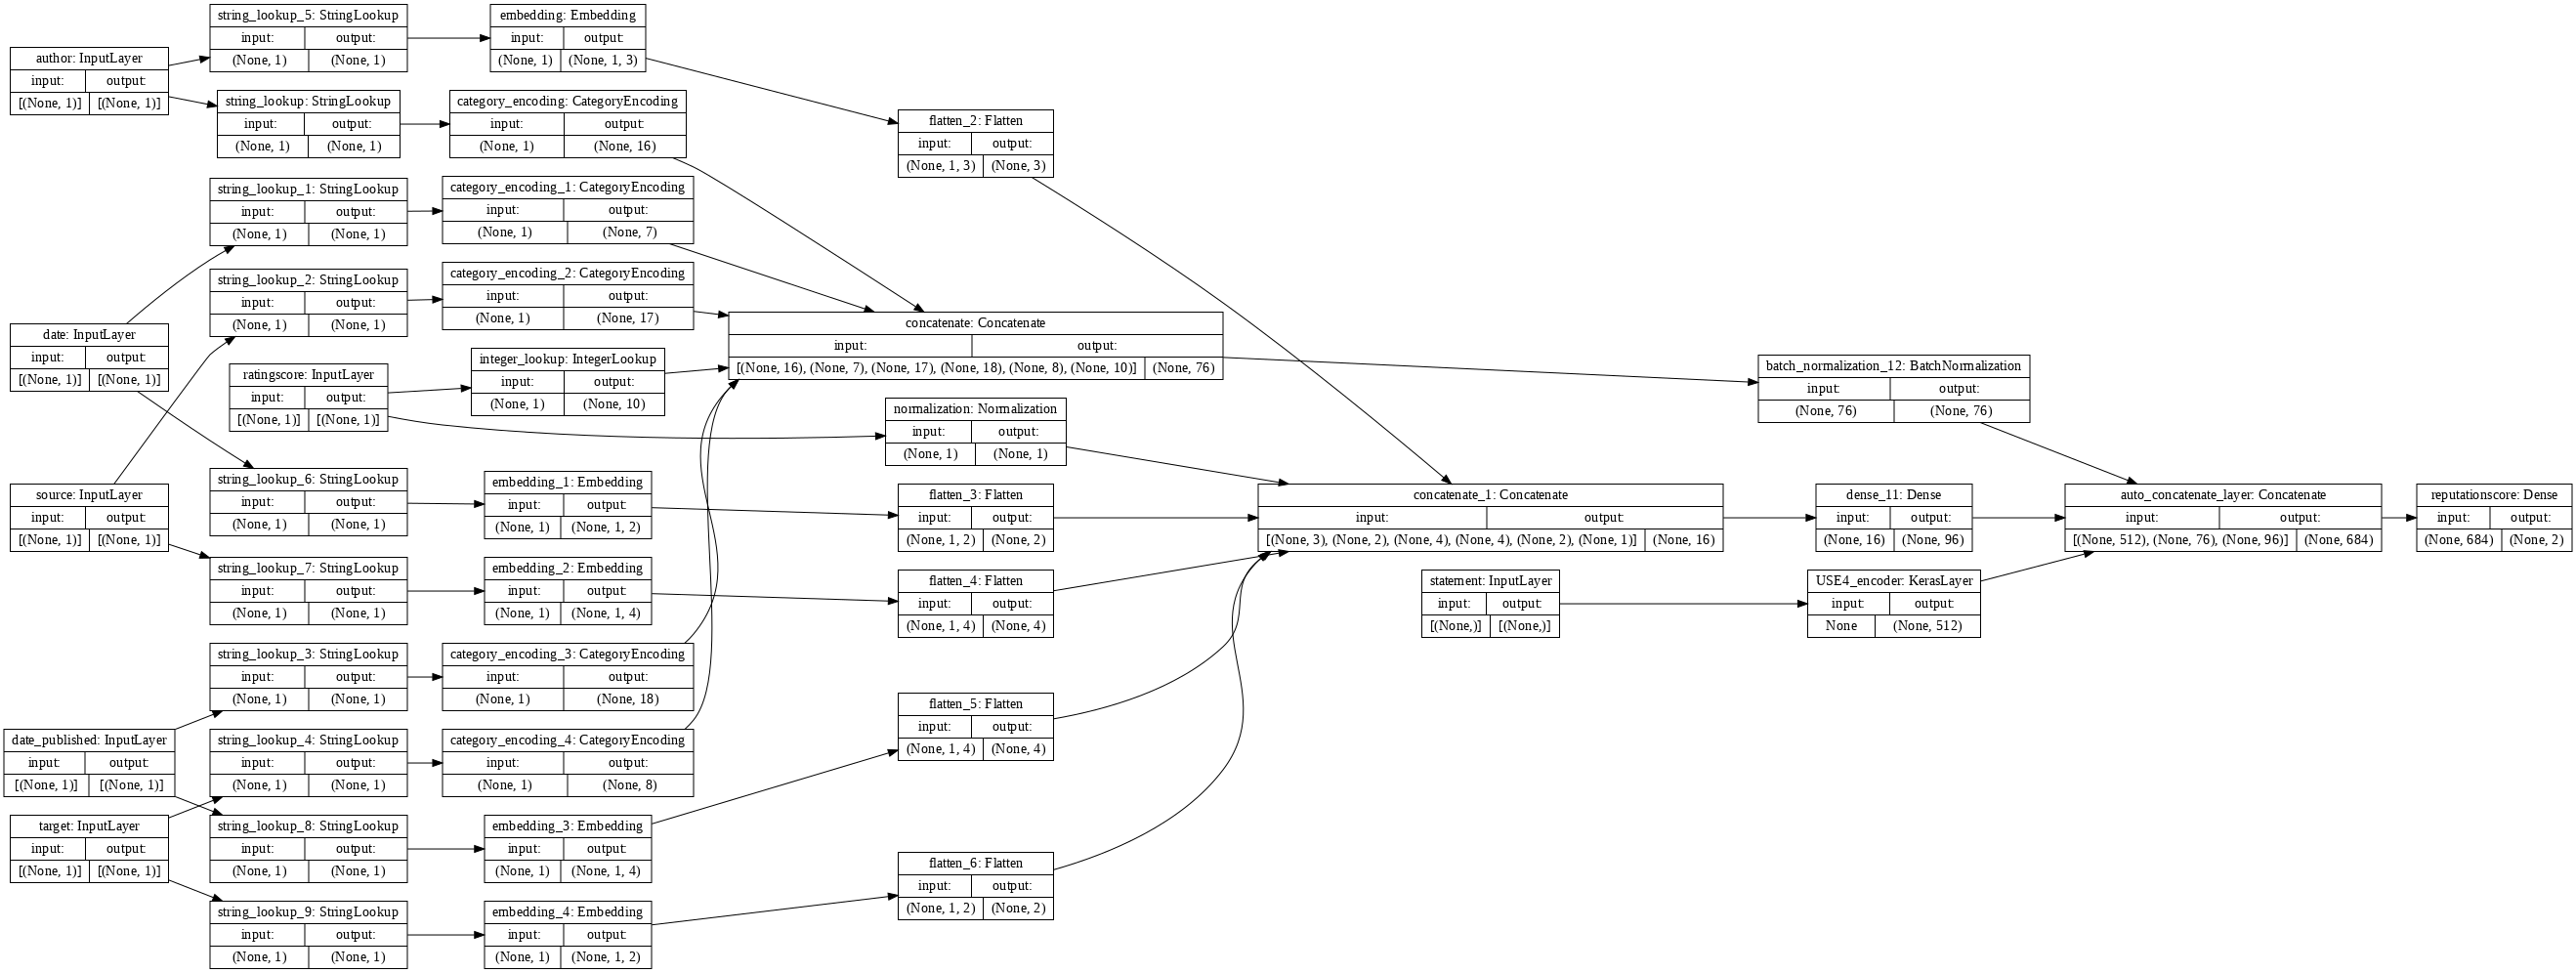

Model plot saved in file: deep_autoviml_jbb_autoviml_nlp_USE_model_after.png


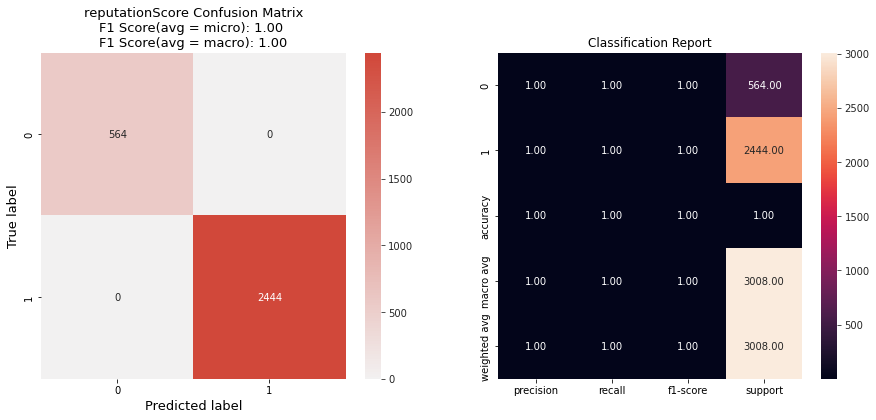

In [21]:
model, dicti = deepauto.fit(train, target, keras_model_type=keras_model_type, 
                            project_name='jbb_autoviml_nlp',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)